In [7]:
!pip install rise

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!jupyter-nbextension install --py rise

Installing C:\Users\User\AppData\Roaming\Python\Python311\site-packages\rise\static -> rise
Up to date: C:\ProgramData\jupyter\nbextensions\rise\main.css
Up to date: C:\ProgramData\jupyter\nbextensions\rise\main.js
Up to date: C:\ProgramData\jupyter\nbextensions\rise\README.md
Up to date: C:\ProgramData\jupyter\nbextensions\rise\rise.png
Up to date: C:\ProgramData\jupyter\nbextensions\rise\rise.yaml
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\.travis.yml
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\bower.json
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\CONTRIBUTING.md
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\demo.html
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\gruntfile.js
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\index.html
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\LICENSE
Up to date: C:\ProgramData\jupyter\nbextensions\rise\reveal.js\package.json

In [9]:
!jupyter-nbextension enable rise --py

Enabling notebook extension rise/main...
      - Validating: ok


### A/B Testing: Experimentation for adoption between Old and New Design

**Problem Statement**

The UX designer at a medium-sized online e-commerce business worked on a new version of the product page, with the hope that it will lead to a higher conversion rate. The product manager (PM) told you that the current conversion rate is about 16% on average throughout the year, and that the team would be happy with an increase of 2%, meaning that the new design will be considered a success if it raises the conversion rate to 20%.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline



C:\Users\User\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [160]:
# calculating the effective size based on the expected rate

effective_size = sms.proportion_effectsize(0.13, 0.15)


# calculate the required size and round it up to whole number
required_n = ceil(sms.NormalIndPower().solve_power(
    effective_size,
    power=0.8,
    alpha=0.05,
    ratio=1
    )
)

required_n

4720

In [161]:
#importing the data

df = pd.read_csv('C:/Users/User/Desktop/ab_data.csv')

df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [162]:
df.shape

(294478, 5)

In [163]:
#check if all the control group are seeing the old page and vice versa


pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [164]:
session_counts = df['user_id'].value_counts()
multi_users = session_counts[session_counts > 1].count()
multi_users

3894

In [165]:
users_to_drop = session_counts[session_counts > 1].index
    
df = df[~df['user_id'].isin(users_to_drop)]
df.shape

(286690, 5)

In [166]:
control_group = df[df['group'] == 'control']
control_group 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [167]:
treatment_group = df[df['group'] == 'treatment']
treatment_group.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [168]:
control_sample = control_group.sample(n=required_n, random_state=22)
control_sample.head()

,user_id,timestamp,group,landing_page,converted
186628,763854,2017-01-21 03:43:17.188315,control,old_page,0
57904,690555,2017-01-18 06:38:13.079449,control,old_page,0
13276,861520,2017-01-06 21:13:40.044766,control,old_page,0
228415,630778,2017-01-05 16:42:36.995204,control,old_page,0
96065,656634,2017-01-04 15:31:21.676130,control,old_page,0


In [169]:
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=22)

In [170]:
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test.head()

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
2,861520,2017-01-06 21:13:40.044766,control,old_page,0
3,630778,2017-01-05 16:42:36.995204,control,old_page,0
4,656634,2017-01-04 15:31:21.676130,control,old_page,0


In [171]:
ab_test['group'].value_counts()

group
control      4720
treatment    4720
Name: count, dtype: int64

In [172]:
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.123,0.329,0.005
treatment,0.126,0.331,0.005


In [173]:
conversion_rates = ab_test.groupby('group')['converted']



In [174]:
std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: stats.sem(x, ddof=0)



In [175]:
conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates

,conversion_rate,std_deviation,std_error
group,,,
control,0.123305,0.328787,0.004786
treatment,0.125636,0.331438,0.004824


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

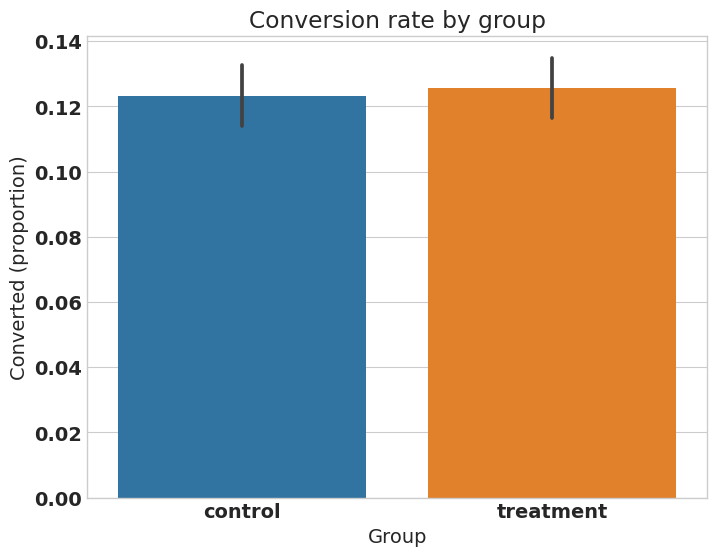

In [176]:
plt.figure(figsize=(8,6));

sns.barplot(x=ab_test['group'], y=ab_test['converted']);
plt.title('Conversion rate by group');
plt.xlabel('Group');
plt.ylabel('Converted (proportion)');

In [177]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [178]:
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [179]:
n_con = control_results.count()
n_treat = treatment_results.count()

successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

In [180]:
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)


print(f'z statistics: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistics: -0.34
p-value: 0.732
ci 95% for control group: [0.114, 0.133]
ci 95% for treatment group: [0.116, 0.135]
